In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# basic

## Optimization

In [4]:
from scipy.optimize import minimize

1. Minimize $f(x)=(x-3)^2$

In [8]:
def f(x):
    return (x-3)**2
res = minimize(f, 2)   

### minimize function takes the 'f' function as a parameter, and we should add an initial guess to run the function

In [7]:
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [9]:
res.x

array([2.99999999])

In [10]:
res.x[0]

2.999999992549203

### the minimize function returns several informations about the optimization result, and its x attribution returns an array which best fits the function    

2. Minimize $f(x,y)=(x-1)^2+(y-2.5)^2$ subject to

$$x-2y+2\geq0$$
$$-x-2y+6\geq0$$
$$-x+2y+2\geq0$$
$$x\geq0$$
$$y\geq0$$

### . 2D function takes in vector x
### . Constraints must be specified as $g_i(x)\geq0$
### . Bounds specified as rectangular

In [16]:
f = lambda x:(x[0]-1)**2 + (x[1]-2.5)**2

In [17]:
cons = ({'type':'ineq','fun': lambda x: x[0]-2*x[1]+2}
        ,{'type':'ineq','fun': lambda x: -x[0]-2*x[1]+6}
        ,{'type':'ineq','fun': lambda x: -x[0]+2*x[1]+2}
       )

In [18]:
bnds = ((0, None), (0, None))

In [19]:
res = minimize(f, (2,0), bounds = bnds, constraints = cons)

In [20]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [21]:
cons_try = ({'type':'ineq','fun': lambda x: x[0]-2*x[1]+2}
        ,{'type':'ineq','fun': lambda x: -x[0]-2*x[1]+6}
        ,{'type':'ineq','fun': lambda x: -x[0]+2*x[1]+2}
        ,{'type':'ineq','fun': lambda x: x[0]}
        ,{'type':'ineq','fun': lambda x: x[1]}
       )

In [22]:
res_try = minimize(f, (2,0), constraints = cons_try)
res_try

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

### contraints is a tuple of multiple dictionaries, and the value of 'fun' must be in the form of $g_i(x)$, while $g_i(x)\geq0$ 

## Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect x and y by means of some experiment)

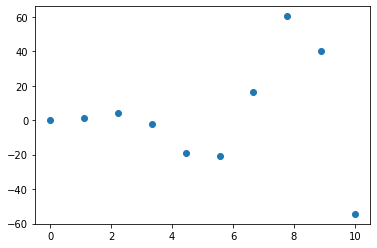

In [23]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x, y)

You want to know the values in between.

In [27]:
x

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [28]:
y

array([  0.        ,   1.10641012,   3.92701263,  -2.11742181,
       -19.04823935, -20.52782454,  16.62894358,  60.31826748,
        40.34415237, -54.40211109])

In [24]:
from scipy.interpolate import interp1d

In [29]:
f = interp1d(x, y, kind = 'linear')

interp1d takes the x and y as the initial points, and use the 'linear' method to interpolate the points between those initial points. f is created as a function, which can receive x values to predict y values

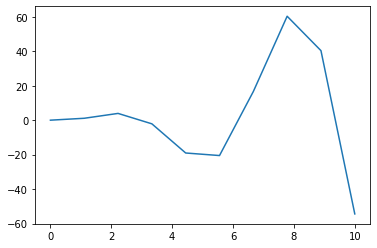

In [30]:
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

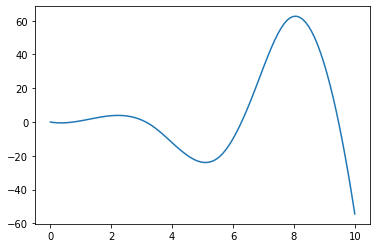

In [31]:
f1 = interp1d(x, y, kind = 'cubic')
y_dense1 = f1(x_dense)
plt.plot(x_dense, y_dense1)

## Curve Fitting

1. Trivial Example

In [32]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

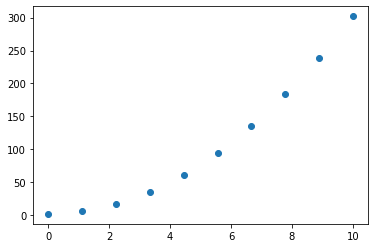

In [33]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y=ax^2+b$. The main goal here is determine the values of a and b.

In [35]:
from scipy.optimize import curve_fit

In [41]:
def func(x, a, b):
    return a*x**2+b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))

### curve_fit takes 'func' function ,x_data and y_data as parameters, then try to find the best fit a and b.

### curve_fit returns parameters and covariances

In [39]:
popt

array([3., 2.])

In [40]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

In [42]:
popt1, pcov1 = curve_fit(func, x_data, y_data)
popt1

array([3., 2.])

### The example above shows the initial guess p0 is not mandate!

2. The equation for spring motion is $y(t)=Acos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data 

In [67]:
t_data = np.array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.034458  ,  1.89488952, -2.24965139, -3.9801263 , -1.45144904,
        2.64022605,  3.93222772,  1.04698361, -2.93916928, -3.77607075,
       -0.57139043,  3.25794185,  3.62897291,  0.1460979 , -3.47713353,
       -3.37751932,  0.33872875,  3.70923141,  3.14025388, -0.76154228,
       -3.83594067, -2.80492209,  1.23220938,  3.9709386 ,  2.49114729,
       -1.62936502, -3.99717996, -2.08765958,  2.06320608,  4.02963497])

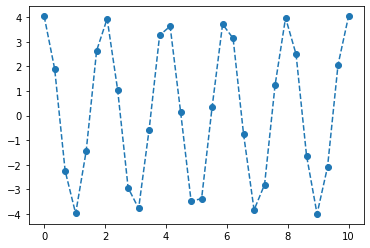

In [69]:
plt.plot(t_data, y_data, 'o--')

$\omega = 2\pi f$, $f = 1/T$, and $T \approx 2 seconds$. Thus good initial guess is

. $\omega = 2\pi(1/2) = \pi$

. $A = 4$

. $\phi = 0$

In [70]:
def func2(t, A, w, phi):
    return A*np.cos(w*t+phi)

In [71]:
popt1, pcov1 = curve_fit(func2, t_data, y_data, p0=(4, np.pi, 0))

In [72]:
popt1

array([ 4.02089681e+00,  3.14683505e+00, -2.21686556e-03])

In [73]:
pcov1

array([[ 1.46812393e-05, -3.59676218e-08,  1.85893242e-07],
       [-3.59676218e-08,  1.17659117e-07, -5.87858916e-07],
       [ 1.85893242e-07, -5.87858916e-07,  3.90876645e-06]])

In [78]:
np.diag(pcov1)

array([1.46812393e-05, 1.17659117e-07, 3.90876645e-06])

### np.diag() can be used to get the diagonal vecters in matrix

In [79]:
A, w, phi = popt1

In [81]:
t_dense = np.linspace(0, 10, 100)
y_dense = func2(t_dense, *popt1)  #*arg is a good way to unpack a tuple

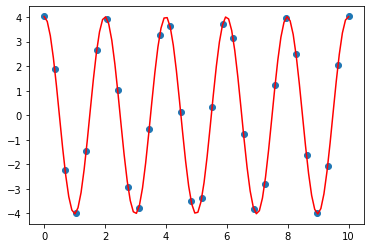

In [87]:
plt.scatter(t_data, y_data)
plt.plot(t_dense, y_dense, c = 'red')